In [1]:
import torch
import numpy as np

In [2]:
input_matrix = torch.randn((5,5))
input_matrix

tensor([[-2.2210, -0.8614, -1.1515, -0.6214,  0.8481],
        [ 1.2162,  0.6325,  1.3020, -0.6866,  0.8990],
        [-0.7998,  0.7474,  1.3357, -0.4230,  0.1261],
        [-0.1096, -0.5314,  0.3550, -0.4169,  0.7790],
        [-0.4462,  0.7586,  0.0533,  1.2151,  0.6190]])

In [3]:
kernel_matrix = torch.randn((3,3))

In [4]:
def conv2d(input_matrix,kernel):
    input_height, input_width = input_matrix.shape
    kernel_height, kernel_width = kernel.shape
    
    # calculate the dimension ot the output matrix
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1
    
    # initialize the output matrix
    output_matrix = torch.zeros((output_height,output_width))
    
    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            # extract the region of interest
            region = input_matrix[i:i+kernel_height,j:j+kernel_width]
            # perform the element wise multiplication and sum the results
            output_matrix[i,j] = torch.sum(region * kernel)
    
    return output_matrix

In [5]:
output_matrix = conv2d(input_matrix,kernel_matrix)

In [6]:
print("Input Matrix:")
print(input_matrix)
print("Input Matrix shape: {}".format(input_matrix.shape))
print("\nKernel:")
print(kernel_matrix)
print("\nKernel: {}".format(kernel_matrix.shape))
print("\nOutput Matrix:")
print(output_matrix)
print("\nOutput Matrix: {}".format(output_matrix.shape))

Input Matrix:
tensor([[-2.2210, -0.8614, -1.1515, -0.6214,  0.8481],
        [ 1.2162,  0.6325,  1.3020, -0.6866,  0.8990],
        [-0.7998,  0.7474,  1.3357, -0.4230,  0.1261],
        [-0.1096, -0.5314,  0.3550, -0.4169,  0.7790],
        [-0.4462,  0.7586,  0.0533,  1.2151,  0.6190]])
Input Matrix shape: torch.Size([5, 5])

Kernel:
tensor([[-0.0246,  0.6083, -0.0570],
        [ 0.7859,  0.8524, -0.1732],
        [ 2.6926,  0.5099, -0.0094]])

Kernel: torch.Size([3, 3])

Output Matrix:
tensor([[-0.9194,  3.7795,  3.2639],
        [-0.5118,  1.3687,  0.9023],
        [-1.0177,  2.8337,  0.2486]])

Output Matrix: torch.Size([3, 3])


In [7]:
def conv2d_with_stride(input_matrix, kernel, stride=1):
    """
    Perform a 2D convolution operation on an input matrix with a given kernel and stride.
    
    Parameters:
    input_matrix (np.ndarray): The input matrix.
    kernel (np.ndarray): The kernel (filter) matrix.
    stride (int): The number of pixels to move the kernel at each step. Default is 1.
    
    Returns:
    np.ndarray: The result of the convolution.
    """
    input_height, input_width = input_matrix.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output matrix
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1

    # Initialize the output matrix
    output_matrix = np.zeros((output_height, output_width))

    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            # Calculate the start and end positions of the region of interest
            start_i = i * stride
            start_j = j * stride
            end_i = start_i + kernel_height
            end_j = start_j + kernel_width
            # Extract the region of interest
            region = input_matrix[start_i:end_i, start_j:end_j]
            # Perform element-wise multiplication and sum the results
            output_matrix[i, j] = torch.sum(region * kernel)

    return output_matrix

In [8]:
output_matrix = conv2d_with_stride(input_matrix,kernel_matrix,stride=2)

In [9]:
print("Input Matrix:")
print(input_matrix)
print("Input Matrix shape: {}".format(input_matrix.shape))
print("\nKernel:")
print(kernel_matrix)
print("\nKernel: {}".format(kernel_matrix.shape))
print("\nOutput Matrix:")
print(output_matrix)
print("\nOutput Matrix: {}".format(output_matrix.shape))

Input Matrix:
tensor([[-2.2210, -0.8614, -1.1515, -0.6214,  0.8481],
        [ 1.2162,  0.6325,  1.3020, -0.6866,  0.8990],
        [-0.7998,  0.7474,  1.3357, -0.4230,  0.1261],
        [-0.1096, -0.5314,  0.3550, -0.4169,  0.7790],
        [-0.4462,  0.7586,  0.0533,  1.2151,  0.6190]])
Input Matrix shape: torch.Size([5, 5])

Kernel:
tensor([[-0.0246,  0.6083, -0.0570],
        [ 0.7859,  0.8524, -0.1732],
        [ 2.6926,  0.5099, -0.0094]])

Kernel: torch.Size([3, 3])

Output Matrix:
[[-0.91940808  3.26393461]
 [-1.01769531  0.24859384]]

Output Matrix: (2, 2)


In [10]:
from torchvision.transforms import transforms
import torchvision
import torch.nn as nn
import torch.nn.functional as F 
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np 
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [11]:
transform  = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.FashionMNIST(root='./fashionMNIST/', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.FashionMNIST(root='./fashionMNIST/', train=False,
                                       download=True, transform=transform)

In [12]:
batch_size = 100
n_iters = 5500
num_epochs = n_iters / (len(trainset) / batch_size)
num_epochs = int(num_epochs)

learning_rate = 0.001

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size,            
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [14]:
classes=train_loader.dataset.class_to_idx
classes

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [15]:
idx_to_class = {value: key for key, value in classes.items()}

In [16]:
def imshow(image, label):
    plt.title(idx_to_class[label])
    plt.imshow(image.reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')

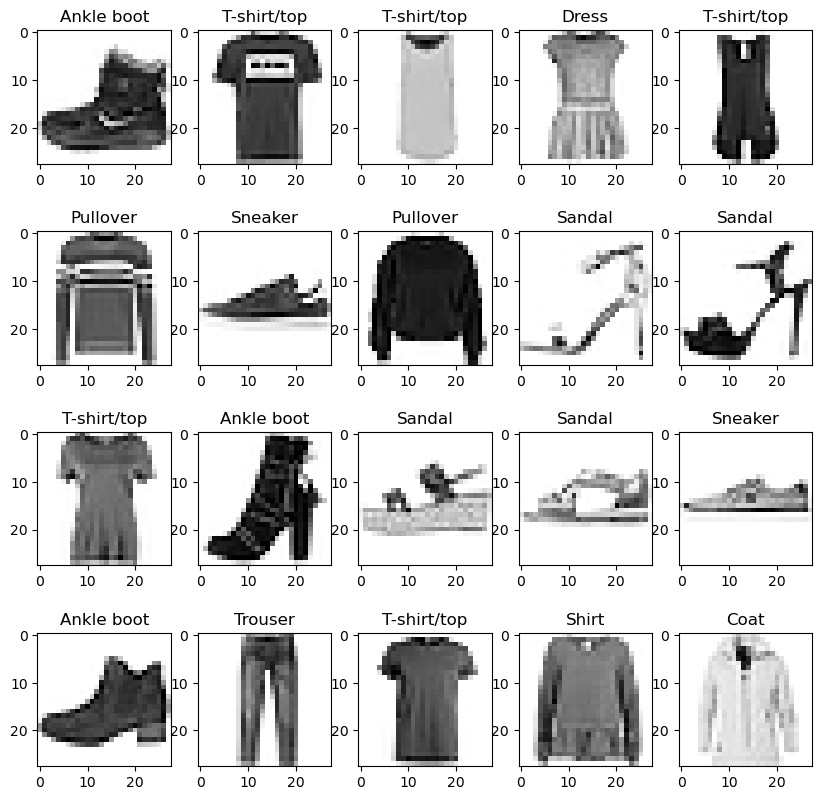

In [17]:
fig = plt.figure(figsize=(10,10))
column = 5
row = 4

for num in range(0, 20):
    image, label = trainset.train_data[num], trainset.train_labels[num].item()
    num += 1
    fig.add_subplot(row, column, num)
    imshow(image, label)

In [38]:
class convnet1(nn.Module):
    def __init__(self) :
        super(convnet1,self).__init__()
        
        # Constraints for layer 1
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2)
        self.batch1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        # constraints for layer 2
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=2)
        self.batch2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        # Defining the linear layer
        self.fc = nn.Linear(32*7*7,10)
        
    def forward(self,x):
        
        # conv 1
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.relu1(x)
        
        # maxpool 1
        x = self.pool1(x)
        
        # conv 2
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.relu2(x)
        
        # maxpool 2
        out = self.pool2(x)
        # flatten the output for the linear layer
        out = out.view(out.size(0), -1)
        # linear layer
        out = self.fc(out)
        
        return out

In [39]:
model = convnet1()

In [40]:
model

convnet1(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [44]:

losses = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader, 0):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward + Backward + Optimizer
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1,\
                     len(trainset)//batch_size, loss.item()))

Epoch : 1/9, Iter : 100/600,  Loss: 0.3983
Epoch : 1/9, Iter : 200/600,  Loss: 0.2879
Epoch : 1/9, Iter : 300/600,  Loss: 0.3863
Epoch : 1/9, Iter : 400/600,  Loss: 0.3719
Epoch : 1/9, Iter : 500/600,  Loss: 0.4092
Epoch : 1/9, Iter : 600/600,  Loss: 0.2944
Epoch : 2/9, Iter : 100/600,  Loss: 0.3397
Epoch : 2/9, Iter : 200/600,  Loss: 0.1648
Epoch : 2/9, Iter : 300/600,  Loss: 0.2804
Epoch : 2/9, Iter : 400/600,  Loss: 0.2996
Epoch : 2/9, Iter : 500/600,  Loss: 0.2661
Epoch : 2/9, Iter : 600/600,  Loss: 0.3341
Epoch : 3/9, Iter : 100/600,  Loss: 0.2691
Epoch : 3/9, Iter : 200/600,  Loss: 0.1633
Epoch : 3/9, Iter : 300/600,  Loss: 0.3587
Epoch : 3/9, Iter : 400/600,  Loss: 0.1620
Epoch : 3/9, Iter : 500/600,  Loss: 0.3581
Epoch : 3/9, Iter : 600/600,  Loss: 0.1912
Epoch : 4/9, Iter : 100/600,  Loss: 0.1909
Epoch : 4/9, Iter : 200/600,  Loss: 0.2978
Epoch : 4/9, Iter : 300/600,  Loss: 0.2689
Epoch : 4/9, Iter : 400/600,  Loss: 0.1903
Epoch : 4/9, Iter : 500/600,  Loss: 0.3204
Epoch : 4/9

In [46]:
torch.save(model.state_dict(), 'convnet1.pth')

In [48]:
conv1 = convnet1()
conv1.load_state_dict(torch.load('convnet1.pth'))

<All keys matched successfully>

In [49]:
correct = 0
total = 0

for images, labels in test_loader:
  images = Variable(images.float())
  
  output = conv1(images)
  _, predicted = torch.max(output.data, 1)
  
  total += labels.size(0)
  correct += (predicted == labels).sum()

  
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 90.6500 %


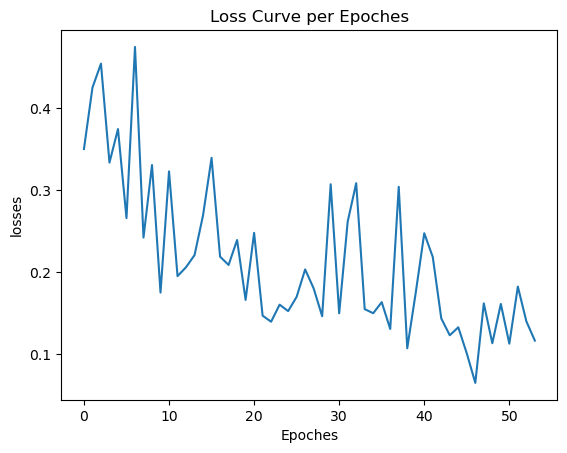

In [50]:
loss = losses[0::100]
plt.xlabel('Epoches')
plt.ylabel('losses')
plt.title('Loss Curve per Epoches')
plt.plot(loss)
plt.show()